In [1]:
using Plots; pyplot()

Plots.PyPlotBackend()

In [2]:
include("voronoi.jl")

getVoronoiDiagram (generic function with 1 method)

# Calculate the Voronoi diagram for random points in a unit box

The diagram is encoded using a doubly-connected edge list (see Computational Geometry by Mark de Berg et al.).

In [3]:
sites = [(rand(), rand()) for i = 1:10];

@time voronoi = getVoronoiDiagram(sites);

  0.872252 seconds (1.27 M allocations: 65.824 MiB, 4.55% gc time)


# Draw the Voronoi diagram and its outer layer

In [4]:
function drawFaces(faces::Vector{Face})
    plot()
    for face in faces
        scatter!(face.site, color="blue")

        halfedge = face.outerComponent
        while true
            p0 = halfedge.origin.coordinates
            p1 = halfedge.twin.origin.coordinates

            plot!([p0, p1], color="black")

            halfedge = halfedge.next
            if halfedge === face.outerComponent
                break
            end
        end
    end
    return plot!(aspect_ratio=:equal, legend=false)
end

drawFaces (generic function with 1 method)

v: 12
e: 21
f: 11
v - e + f = 2


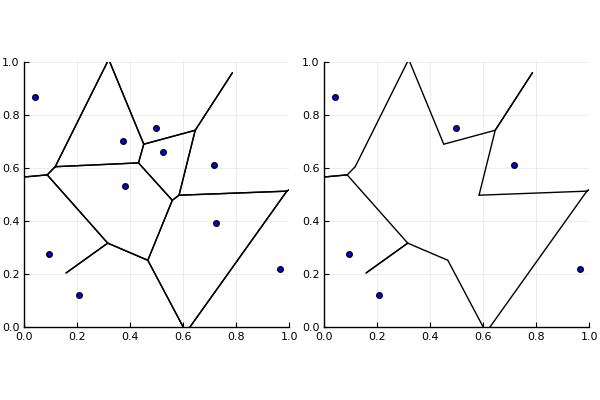

In [5]:
v = length(voronoi.vertices)
e = length(voronoi.halfedges) ÷ 2 # halfedge / 2 gives the actual number of edges
f = length(voronoi.faces) + 1 # +1 counts the external face (assuming a connected planar diagram)

diagram_plt = drawFaces(voronoi.faces)
border_plt = drawFaces([v for v in voronoi.faces if v.area == Inf])

println("v: ", v)
println("e: ", e)
println("f: ", f)
println("v - e + f = ", v - e + f)

plot(diagram_plt, border_plt, layout = 2, xlims=(0,1), ylims=(0,1))

# Getting information about a given face

area: Inf

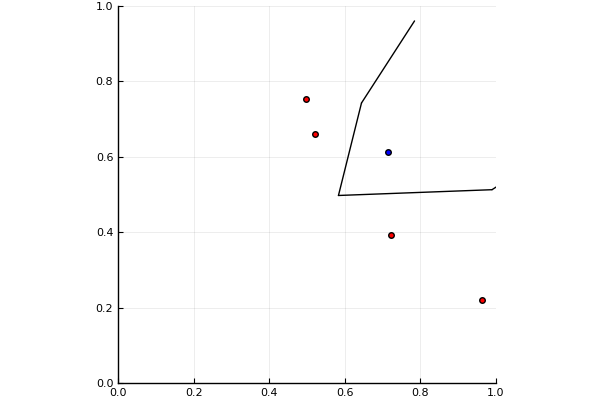

In [6]:
face = voronoi.faces[length(voronoi.faces)÷2]

plot()
halfedge = face.outerComponent
while true
    p0 = halfedge.origin.coordinates
    p1 = halfedge.twin.origin.coordinates
    
    # get neighboring site
    neighbor = halfedge.twin.incidentFace.site
    scatter!(neighbor, color="red")
    
    plot!([p0, p1], color="black")

    halfedge = halfedge.next
    if halfedge === face.outerComponent
        break
    end
end
print("area: ", face.area)
plot!(xlims=(0,1), ylims=(0,1), aspect_ratio=:equal, legend=false)
scatter!(face.site, color="blue")

# Delaunay triangulation

In [7]:
neighbors = []
for face in voronoi.faces
    tmp = []
    halfedge = face.outerComponent
    while true
        p0 = halfedge.origin.coordinates
        p1 = halfedge.twin.origin.coordinates

        # get neighboring site
        neighbor = halfedge.twin.incidentFace.site
        push!(tmp, neighbor)

        halfedge = halfedge.next
        if halfedge === face.outerComponent
            break
        end
    end
    push!(neighbors, tmp)
end

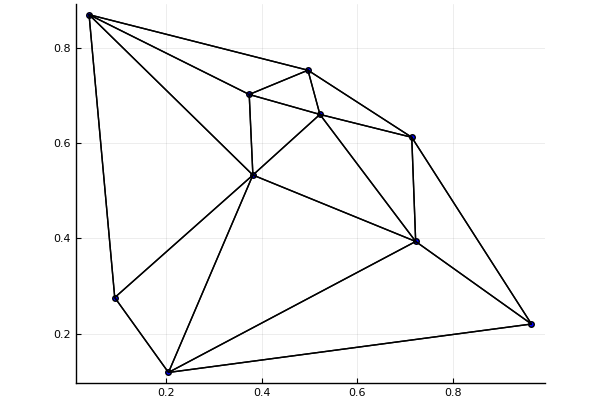

In [8]:
plot()
for i in 1:length(voronoi.faces)
    f = voronoi.faces[i].site
    scatter!(f, color="blue")
    for v in neighbors[i]
        plot!([f, v], color="black")
    end
end
return plot!(aspect_ratio=:equal, legend=false)

# Other examples

In [9]:
using CSV

## Squared grid

  0.450797 seconds (334.03 k allocations: 15.625 MiB, 2.54% gc time)
v: 882
e: 1365
f: 485
v - e + f = 2


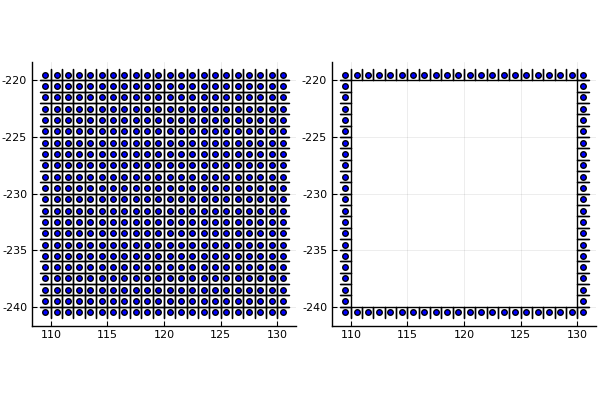

In [10]:
points = CSV.read("cuadricula.csv")
sites = [(points[i,1], points[i,2]) for i in 1:length(points[!,1])]
@time voronoi = getVoronoiDiagram(sites);

v = length(voronoi.vertices)
e = length(voronoi.halfedges) ÷ 2 # halfedge / 2 gives the actual number of edges
f = length(voronoi.faces) + 1 # +1 counts the external face (assuming a connected planar diagram)
println("v: ", v)
println("e: ", e)
println("f: ", f)
println("v - e + f = ", v - e + f)

diagram_plt = drawFaces(voronoi.faces)
border_plt = drawFaces([v for v in voronoi.faces if v.area == Inf])
plot(diagram_plt, border_plt, layout=2)

## Penrose tessellation

  0.015239 seconds (31.27 k allocations: 847.641 KiB)
v: 488
e: 737
f: 251
v - e + f = 2


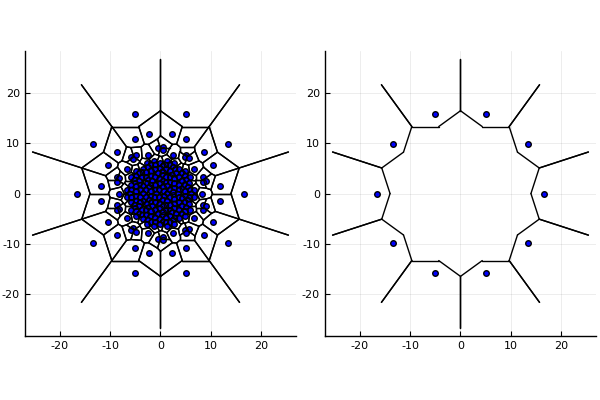

In [11]:
points = CSV.read("centroides.csv")
sites = [(points[i,1], points[i,2]) for i in 1:length(points[!,1])]
@time voronoi = getVoronoiDiagram(sites);

v = length(voronoi.vertices)
e = length(voronoi.halfedges) ÷ 2 # halfedge / 2 gives the actual number of edges
f = length(voronoi.faces) + 1 # +1 counts the external face (assuming a connected planar diagram)
println("v: ", v)
println("e: ", e)
println("f: ", f)
println("v - e + f = ", v - e + f)

diagram_plt = drawFaces(voronoi.faces)
border_plt = drawFaces([v for v in voronoi.faces if v.area == Inf])
plot(diagram_plt, border_plt, layout=2)